# 1.0 Full Exploratory Data Analysis

### Libraries

In [98]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import data_scientist_challenge___latam_airlines.utils.paths as path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import time

### Specify input file

In [3]:
dataset_SCL = path.data_raw_dir("dataset_SCL.csv")

### Process Data

#### Read Data

In [4]:
df = pd.read_csv(dataset_SCL)

/var/folders/mh/4z__6zcj6mv5slhwpb8j4xq40000gn/T/ipykernel_70381/2862133649.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_SCL)


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


- Podemos observar la información general de los datos en los que podemos saber que tenemos 68206 registro en el conjunto de datos, tambien tenemos 18 columnas, en las cuales tenemos algunos datos que son del tipo object o string y tenemos unos de valores int64 que representan valores enteros, de igual forma observamos que exiten fechas las cuales se pueden hacer las transformaciones correspondientes para poder llevar a cabo operaciones para sacar mayor información del conjunto de datos

In [6]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


- Se observar las primeros elementos del dataframe

In [7]:
df.tail()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68205,2017-12-31 14:55:00,400,SCEL,SPJC,JAT,2017-12-31 15:04:00,400.0,SCEL,SPJC,JAT,31,12,2017,Domingo,I,JetSmart SPA,Santiago,Lima


- Se observaron los últimos elemenots del dataframe

In [8]:
df['Fecha-I'] = df['Fecha-I'].apply(lambda x: pd.to_datetime(x,errors='coerce'))

In [9]:
df['Fecha-O'] = df['Fecha-O'].apply(lambda x: pd.to_datetime(x,errors='coerce'))

- Se procedio a realizar el cambio de las columnas que tienen fecha que se encontraban en formato object a ser llevados al formato de tiempo 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

### Explore Data

#### Describe

In [11]:
df['Fecha-I'].describe()

/var/folders/mh/4z__6zcj6mv5slhwpb8j4xq40000gn/T/ipykernel_70381/1005773805.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['Fecha-I'].describe()


count                   68206
unique                  53252
top       2017-07-28 13:30:00
freq                        6
first     2017-01-01 00:15:00
last      2017-12-31 23:55:00
Name: Fecha-I, dtype: object

- Se puede observar en la descripción inicial de la fecha y hora programada del vuelo la que mas se repite es la del 2017-07-28 13:30 el cual lo hace en 6 oportunidades. Además podemos saber cual es la primera fecha y hora programada del vuelo así como la última según nuestro conjunto de datos.

In [12]:
df['Vlo-I'].describe()

count     68206
unique      750
top         174
freq        686
Name: Vlo-I, dtype: object

- El número de vuelo programado tenemos el que mas se repite es el 174 el cual lo hace con una frecuencia de 686 oportunidades

In [13]:
df['Ori-I'].describe()

count     68206
unique        1
top        SCEL
freq      68206
Name: Ori-I, dtype: object

- El código de origen de la ciudad es SCEL el cual aparece en cada una de las filas de nuestro conjunto de datos siendo un valor constante para este dataset

In [14]:
df['Des-I'].describe()

count     68206
unique       64
top        SCFA
freq       5787
Name: Des-I, dtype: object

- Podemos observar que exitén dento del conjunto de datos 64 códigos de ciudad de destino programados siendo SCFA el que mas se repite con una frecuencia de 5787

In [15]:
df['Emp-I'].describe()

count     68206
unique       30
top         LAN
freq      37611
Name: Emp-I, dtype: object

- Evaluando la columna del código aerlínea de vuelo programado podemos observar que hay 30 valores unicos. Teniendo en cuenta que el valor que más se repite es LAN y lo hace con una frecuencia de 37611 oportunidades.

In [16]:
df['Fecha-O'].describe()

/var/folders/mh/4z__6zcj6mv5slhwpb8j4xq40000gn/T/ipykernel_70381/2404728753.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['Fecha-O'].describe()


count                   68206
unique                  62774
top       2017-11-05 14:51:00
freq                        5
first     2017-01-01 00:04:00
last      2018-01-01 00:12:00
Name: Fecha-O, dtype: object

- En lo que respecta a la fecha y hora de operación del vuelo tenemos una fecha y hora que se repite en 5 oportunidades teniendo esta como un valor top, además podemos identificar la primera fecha y la última lo que nos puede ayudar en un analísis posterior para ver la diferencia entre la fecha y hora programada versus estos valores de operación.

In [17]:
df['Vlo-O'].describe()

count     68205
unique      866
top         174
freq        649
Name: Vlo-O, dtype: object

- Podemos observar que existen 866 valores unicos del número de operación del vuelo teniendo el valor que mas se repite el 174 haciendolo en 649 oportunidades.

In [18]:
df['Ori-O'].describe()

count     68206
unique        1
top        SCEL
freq      68206
Name: Ori-O, dtype: object

- Tal como sucede con con el código de ciudad de origen programado aquí podemos observar el de operación siendo un valor unico para todo el conjunto de datos el cual es el SCEL.

In [19]:
df['Des-O'].describe()

count     68206
unique       63
top        SCFA
freq       5786
Name: Des-O, dtype: object

- En lo que respecta al código de ciudad de destino de operación se cuenta con 63 valores unicos siendo el valor top SCFA haciendolo en 5786 oportunidades, este valor sera necesario comparar con el programado ya que existe una leve diferencia entro los valores 

In [20]:
df['Emp-O'].describe()

count     68206
unique       32
top         LAN
freq      20988
Name: Emp-O, dtype: object

- Respecto al código de la aerolínea de vuelo operado existen 32 valores unicos siendo el valor top LAN realizado en 20988 oportunidades. Este valor tambien tiene unas variantes respecto a los valores programados que por tal motivo sera posible evaluar y comparar para tener un analísis más detallado.

In [21]:
df['DIA'].describe()

count    68206.000000
mean        15.714790
std          8.782886
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: DIA, dtype: float64

- Respecto a la columna de DIA podemos observar las estadisticas descriptivas del mismo el cual hace sentido ya que son los 31 días de un mes, y tanto la distribución de los cuartiles como el valor promedio hace notar el comportamiento de los días de un mes.

In [22]:
df['MES'].describe()

count    68206.000000
mean         6.622585
std          3.523321
min          1.000000
25%          3.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: MES, dtype: float64

- Tal como se muestra en la descripción de la columna MES se observar una distribución de los 12 meses del año siendo relativamente equilibrado ya que se observa que el valor promedio se encuentra un poco enciam del valor de 6 lo que da a entender que es un flujo constante durante todos los meses el cual podriamos corroborar su distribución en un gráfico de barras para ilar mas fino respecto a los meses de mayor cantidad de vuelos.

In [23]:
df['AÑO'].describe()

count    68206.000000
mean      2017.000029
std          0.005415
min       2017.000000
25%       2017.000000
50%       2017.000000
75%       2017.000000
max       2018.000000
Name: AÑO, dtype: float64

- Respecto al año se puede dar a entender que estamos analizando todo el año del 2017, y como caso escepcional tenemos como valor mázimo 2018 pero esto no se refleja en un cambio del promedio por tal motivo estamos hablando de datos del 2017 en casi su totalidad.

In [24]:
df['DIANOM'].describe()

count       68206
unique          7
top       Viernes
freq        10292
Name: DIANOM, dtype: object

- Respecto a los de la semana de operación del vuelo se muestra que existen 7 lo cual es correcto ya que tenemos 7 días de las semana y esto nos indica de igual forma que no tenemos datos escritos de otra forma diferente que pueda sumar un valor distinto a los dias de la semana, otra cosa particular es que poseemos el valor top es Viernes haciendolo en 10292 oportunidades lo que hace genear hipotesis que esta distribuido con valores muy cercanos entre cada dia de la semana

In [25]:
df['TIPOVUELO'].describe()

count     68206
unique        2
top           N
freq      36966
Name: TIPOVUELO, dtype: object

- En lo que respecta a los tipos de vuelos tenemos dos valores unicos lo que refleja las dos categorias que seria los viajes internacionales y los viajes nacionales siendo estos los nacionales representacdos por la letra N lo que lo hacen en una mayor oportunidad y viendo el tamaño del conjunto de datos tampoco es un valor tan alejado en la cantidad de vuelos nacionales versus internacionales el cual se puede apoyar e una gráfica para ver la distribución de estos tipos de vuelos

In [26]:
df['OPERA'].describe()

count           68206
unique             23
top       Grupo LATAM
freq            40892
Name: OPERA, dtype: object

- Dentro de los nombres de las aerolíneas que opera podemos observar que existen 23, el cual tiene una que destaca con una mayor cantidad de aparición dentro del conjunto de datos el Grupo LATAM el cual lo hace con una frecuencia 40892 respecto al conjunto de datos podemos ir asumiendo que lleva una gran cantidad respecto a las otras aerolíneas.

In [27]:
df['SIGLAORI'].describe()

count        68206
unique           1
top       Santiago
freq         68206
Name: SIGLAORI, dtype: object

- Ya que estamos evaluando con este dataset el aeropuerto de Santiago de Chile, podemos observar que el valor único que opera como ciudad de origen para esta columna es sin lugar a duda Santiago. 

In [28]:
df['SIGLADES'].describe()

count            68206
unique              62
top       Buenos Aires
freq              6335
Name: SIGLADES, dtype: object

- Dentro de los nombres de las ciudades de destino el valor top es Buenos Aires el cual tiene una frecuencia de 6335, sabiendo que tenemos 62 valores unicos o podriamos llamarlos tambien ciudades des destino dentro del conjunto de datos.

#### Statistical graphs

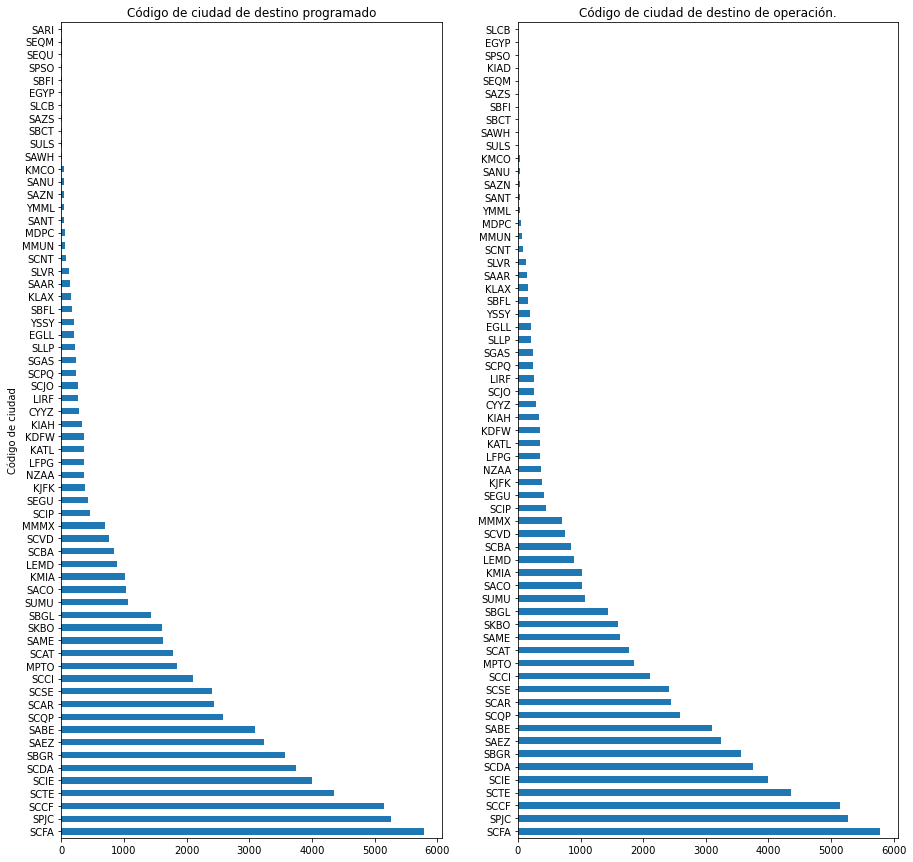

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (15, 15))
df["Des-I"].value_counts().plot.barh(ax = ax[0])
ax[0].set_title("Código de ciudad de destino programado")
ax[0].set_ylabel("Código de ciudad")
df["Des-O"].value_counts().plot.barh(ax = ax[1])
ax[1].set_title("Código de ciudad de destino de operación.")
plt.show()

- Se puede observar unas diferencias entre la cantidad entre la cantidad de código de ciudad de destino programado versus el código de destino de destino de operación podemos notar de forma preliminar en los valores de menor frecuencia el cual tiene un orden distinto a diferencia de los valores de mayor frecuencia cuya gráfica muestra un comportamiento similar

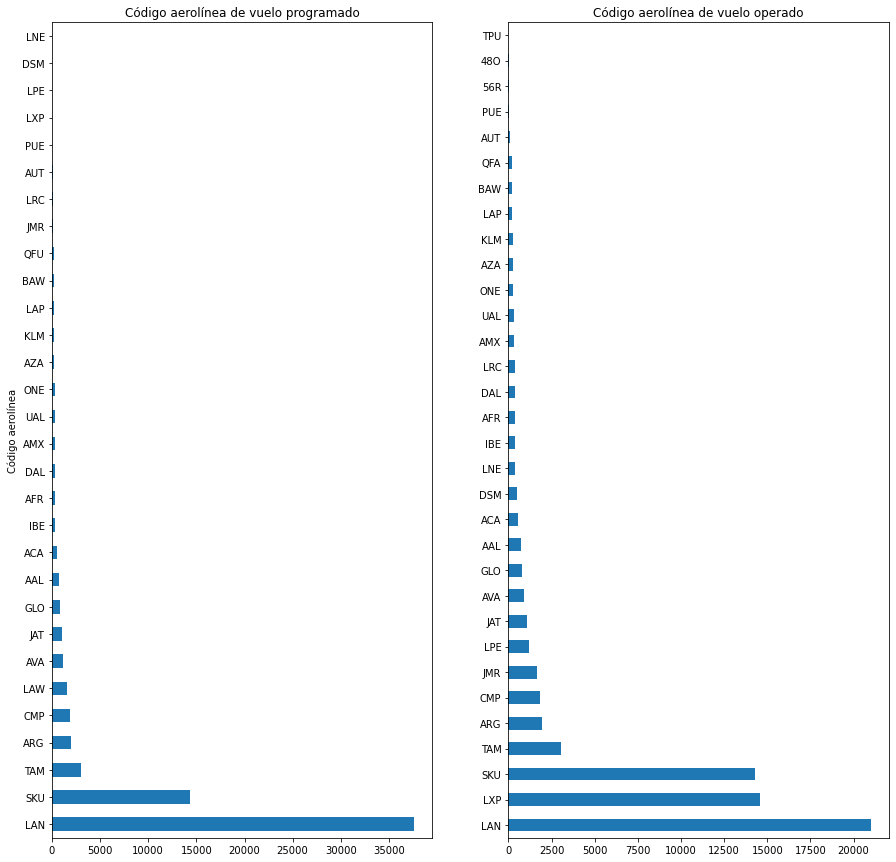

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (15, 15))
df["Emp-I"].value_counts().plot.barh(ax = ax[0])
ax[0].set_title("Código aerolínea de vuelo programado")
ax[0].set_ylabel("Código aerolínea")
df["Emp-O"].value_counts().plot.barh(ax = ax[1])
ax[1].set_title("Código aerolínea de vuelo operado")
plt.show()

- En este caso podemos observar la comparativa entre los códigos de aerolínea de los vuelos programados versos los operados en cual podemos notar una diferencia entre ambos valores lo que genera hipotesis de cambios de la programación respecto a la operación de la diferencia mostrada en las gráficas.

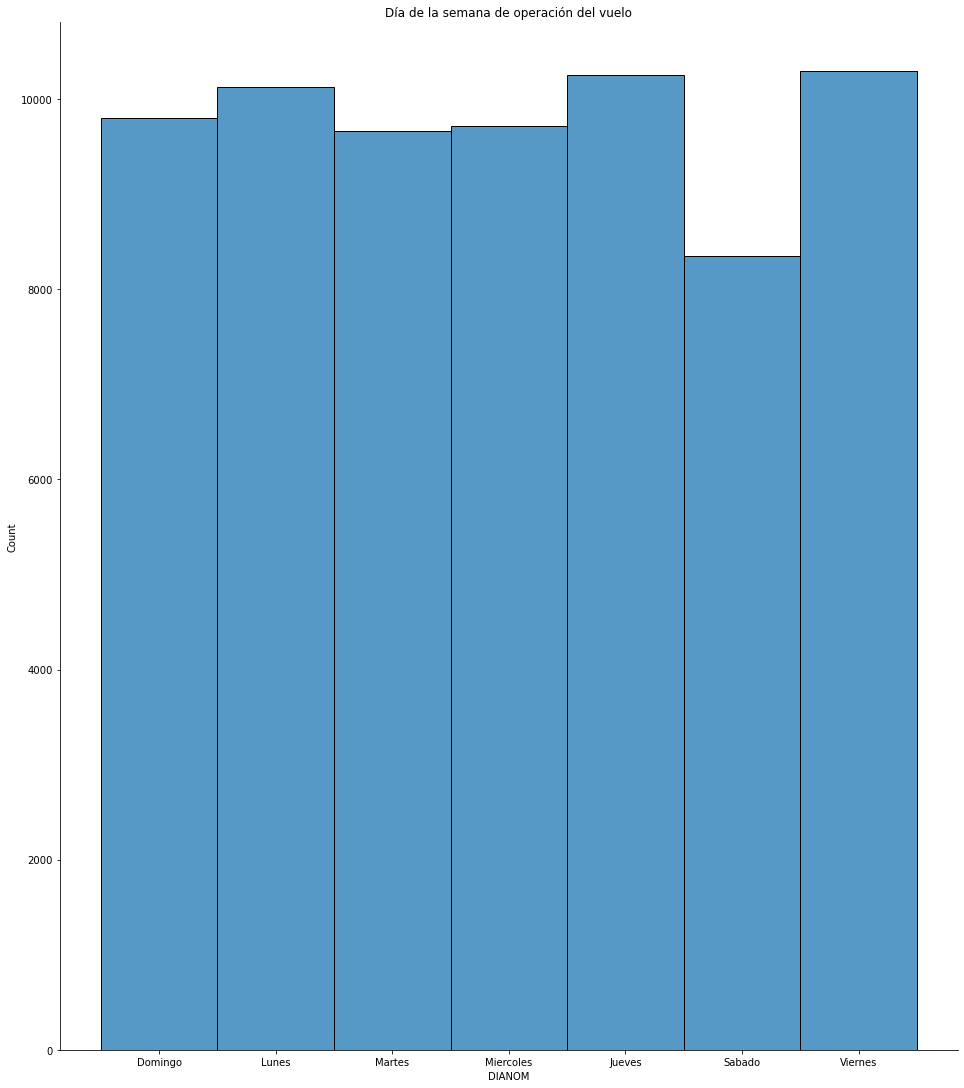

In [31]:
sns.displot(df['DIANOM'],height=15, aspect=.9)
plt.title('Día de la semana de operación del vuelo')
plt.show()

- En la gráfica nos muestra la operación de vuelos de los días de la semana teniendo como el día de una menor frecuencia el día sabado y los dos de mayor frecuencia el jueves y viernes

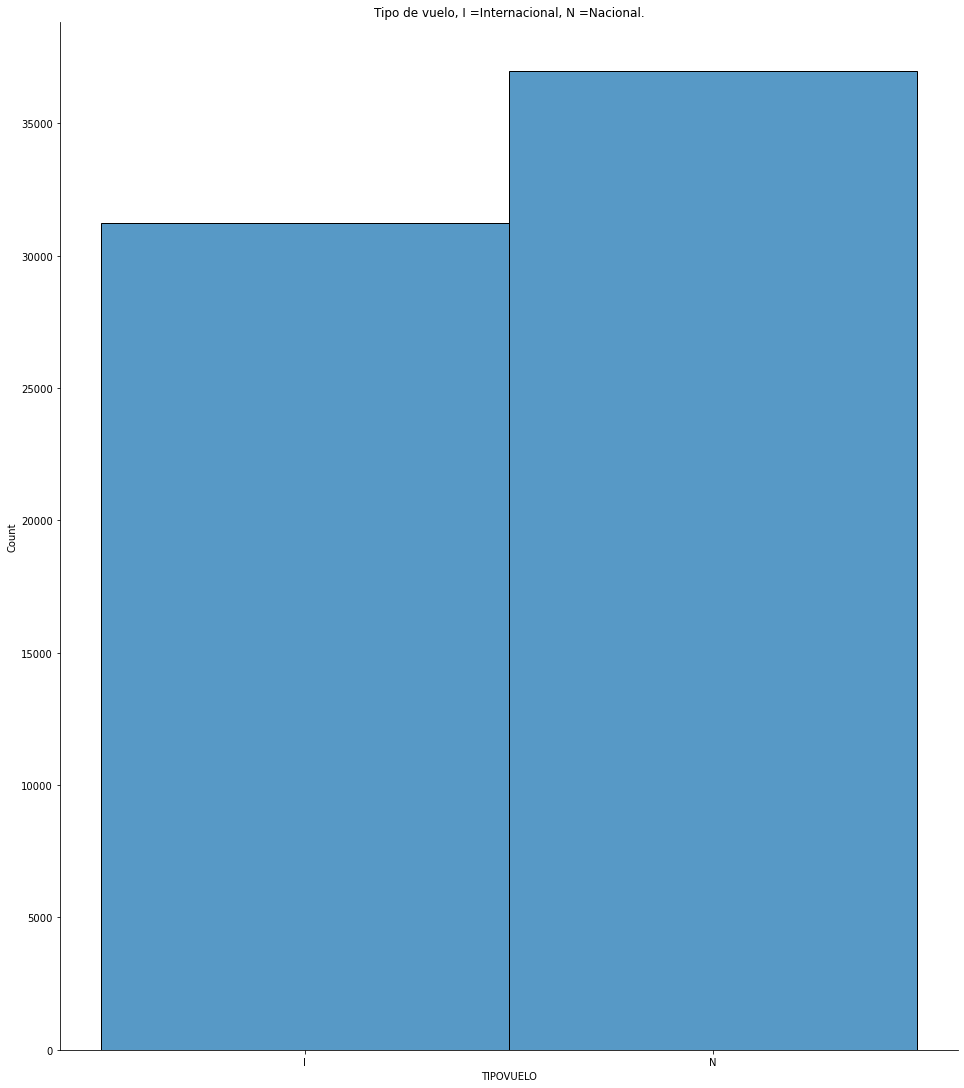

In [32]:
sns.displot(df['TIPOVUELO'],height=15, aspect=.9)
plt.title('Tipo de vuelo, I =Internacional, N =Nacional.')
plt.show()

- Dentro de los tipos de vuelos podemos observar que hay una mayor cantidad de vuelos nacionales que internacionales 

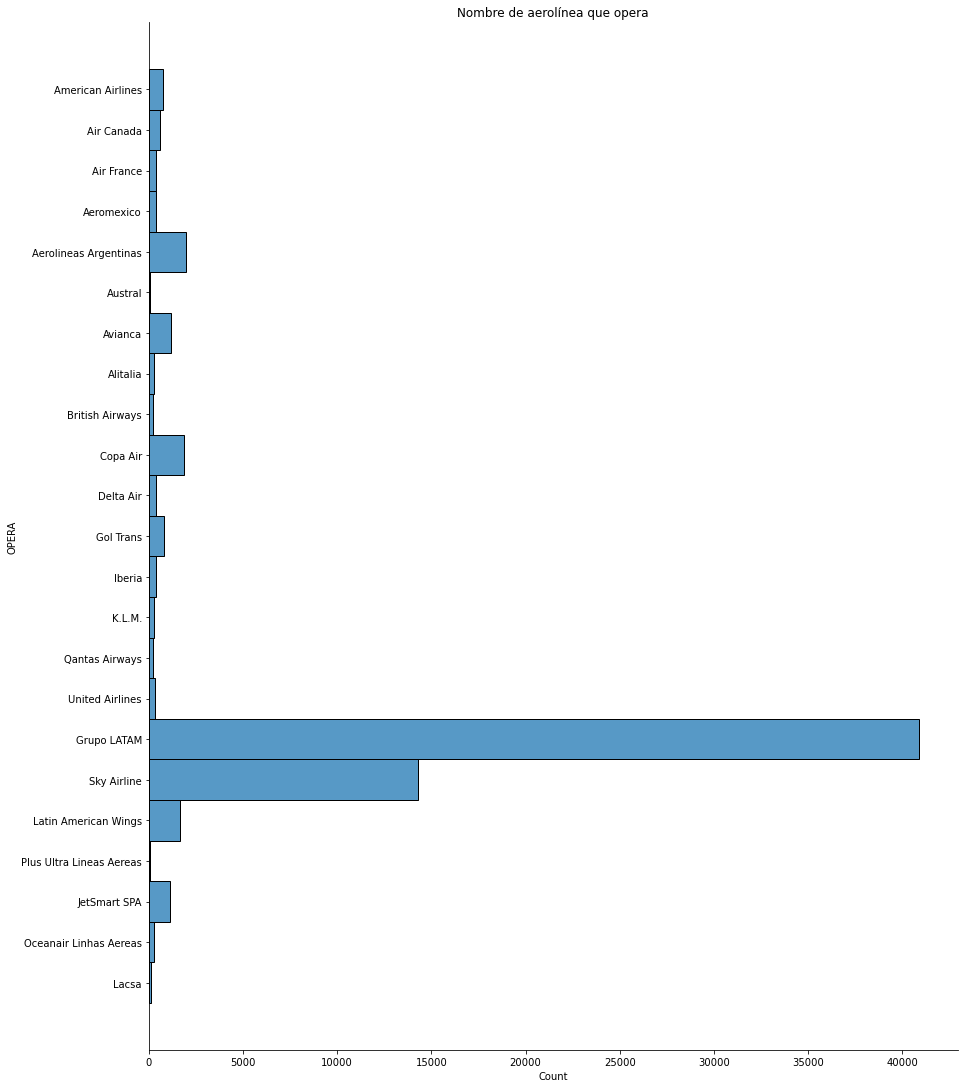

In [33]:
sns.displot(df,y='OPERA',height=15, aspect=.9)
plt.title('Nombre de aerolínea que opera')
plt.show()

- Respecto a las aerolíneas que opera se encuentra con una mayor frecuencia el Grupo LATAM muy por encima de las otras operadoras seguida de Sky Airline pero igual con un margen muy superior y luego el resto de las otras operadoras.

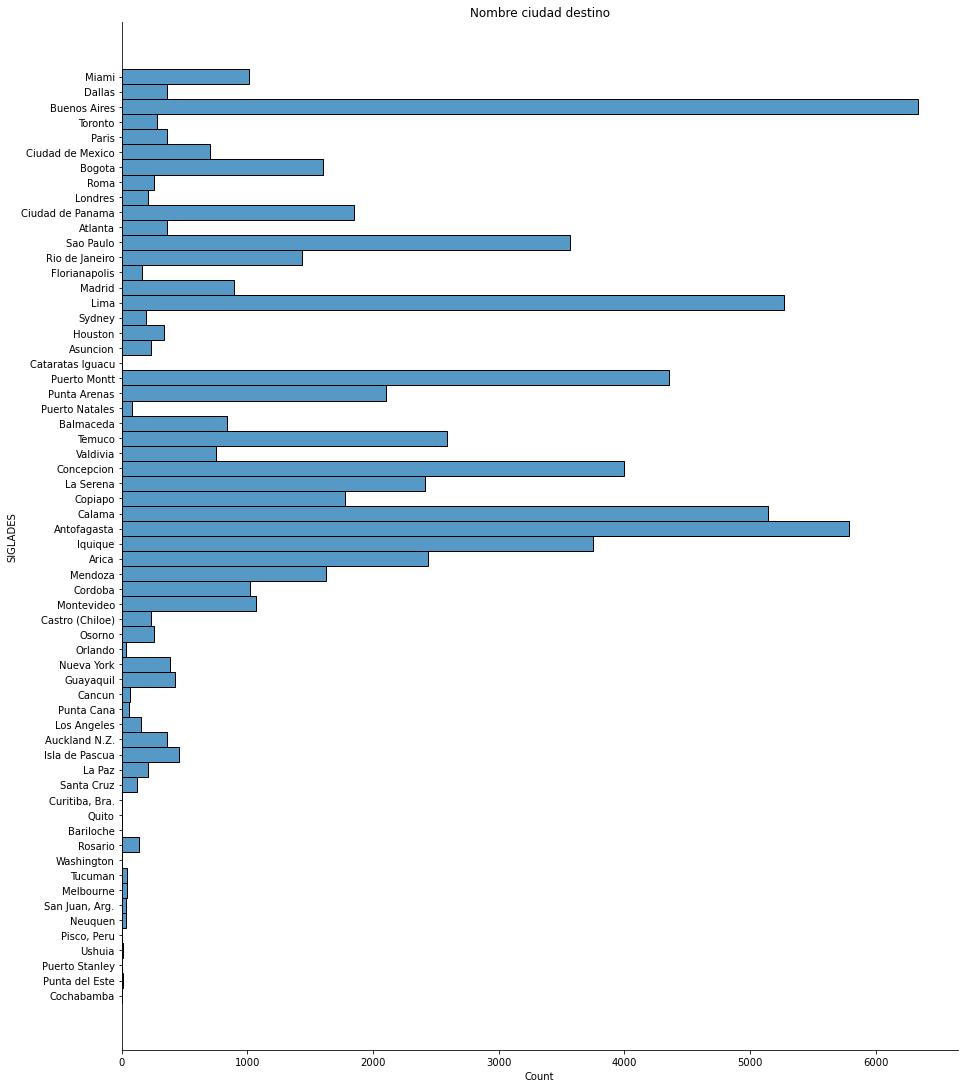

In [34]:
sns.displot(df,y='SIGLADES',height=15, aspect=.9)
plt.title('Nombre ciudad destino')
plt.show()

- A lo que se refiere a la frecuencia de la ciudad destino podemos observar que la de mayor frecuencia es Buenos Aires siendo un vuelo internacional y seguido de ello tenemos Antofagasta, como caso curioso un vuelo nacional.

### Data Transformation

#### Difference in minutes between Fecha-O and Fecha-I

In [35]:
df['Hora-I'] = pd.to_datetime(df['Fecha-I']).dt.time
df['Hora-I']

0        23:30:00
1        23:30:00
2        23:30:00
3        23:30:00
4        23:30:00
           ...   
68201    14:55:00
68202    14:55:00
68203    14:55:00
68204    14:55:00
68205    14:55:00
Name: Hora-I, Length: 68206, dtype: object

In [36]:
df['Fecha-I-sin-hora'] = pd.to_datetime(df['Fecha-I']).dt.date

In [37]:
df['Hora-O'] = pd.to_datetime(df['Fecha-O']).dt.time

In [38]:
df['Fecha-O-sin-hora'] = pd.to_datetime(df['Fecha-O']).dt.date

In [39]:
df['dif_mim'] = df['Fecha-O'] - df['Fecha-I']
df['dif_mim'] = df['dif_mim']/np.timedelta64(1,'m')

#### Delay Fly feature

In [40]:
df['atraso_15'] = ["si" if min > 15 else "no" for min in df['dif_mim']]

#### Higth season features

In [41]:
start = datetime.datetime.strptime("2017-07-15", "%Y-%m-%d")
end = datetime.datetime.strptime("2017-07-31", "%Y-%m-%d")
date_generated = pd.date_range(start, end)
date_generated = date_generated.strftime("%Y-%m-%d").tolist()
date_generated = np.array(date_generated, dtype='datetime64')

In [42]:
start_2 = datetime.datetime.strptime("2017-09-11", "%Y-%m-%d")
end_2 = datetime.datetime.strptime("2017-09-30", "%Y-%m-%d")
date_generated_2 = pd.date_range(start_2, end_2)
date_generated_2 = date_generated_2.strftime("%Y-%m-%d").tolist()
date_generated_2 = np.array(date_generated_2, dtype='datetime64')


In [43]:
start_3 = datetime.datetime.strptime("2017-12-15", "%Y-%m-%d")
end_3 = datetime.datetime.strptime("2018-03-03", "%Y-%m-%d")
date_generated_3 = pd.date_range(start_3, end_3)
date_generated_3 = date_generated_3.strftime("%Y-%m-%d").tolist()
date_generated_3 = np.array(date_generated_3, dtype='datetime64')


In [44]:
start_4 = datetime.datetime.strptime("2016-12-15", "%Y-%m-%d")
end_4 = datetime.datetime.strptime("2017-03-03", "%Y-%m-%d")
date_generated_4 = pd.date_range(start_4, end_4)
date_generated_4 = date_generated_4.strftime("%Y-%m-%d").tolist()
date_generated_4 = np.array(date_generated_4, dtype='datetime64')

In [45]:
list_temporada_alta = np.concatenate((date_generated_4, date_generated_3, date_generated_2, date_generated))


In [46]:
df['temporada_alta'] = df['Fecha-I-sin-hora'].apply(lambda x: '1' if (x in list_temporada_alta) else '0')

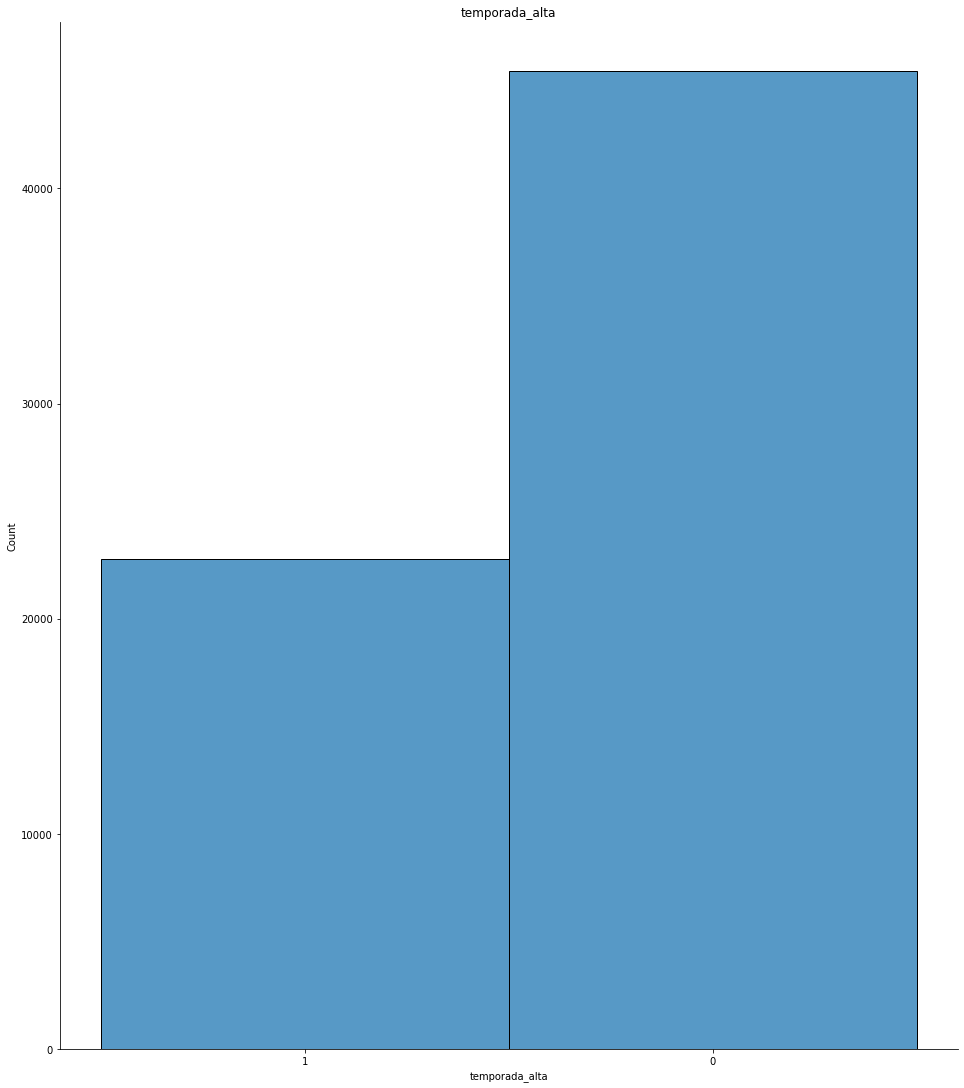

In [47]:
sns.displot(df['temporada_alta'],height=15, aspect=.9)
plt.title('temporada_alta')
plt.show()

#### Day period : morning (between 5:00 and 11:59), afternoon (between 12:00 and 18:59), and night (between 19:00 and 4:59)

In [48]:
condlist = [df['Fecha-I'].dt.time.between(time(5), time(11, 59)),
            df['Fecha-I'].dt.time.between(time(12), time(18, 59))
            ]

df['periodo_dia'] = np.select(condlist, ['mañana', 'tarde'], default='noche')

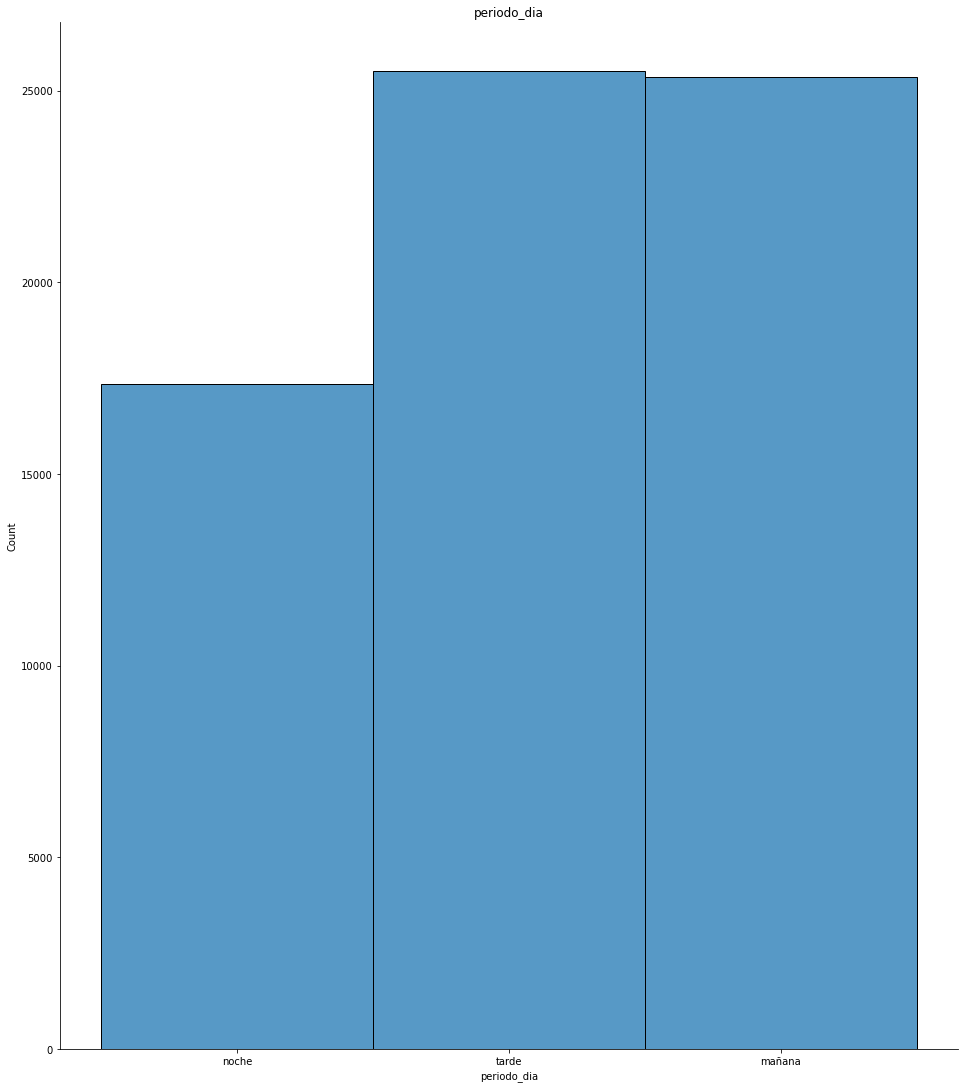

In [49]:
sns.displot(df['periodo_dia'],height=15, aspect=.9)
plt.title('periodo_dia')
plt.show()

In [50]:
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,SIGLAORI,SIGLADES,Hora-I,Fecha-I-sin-hora,Hora-O,Fecha-O-sin-hora,dif_mim,atraso_15,temporada_alta,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,23:30:00,2017-01-01,23:33:00,2017-01-01,3.0,no,1,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,23:30:00,2017-01-02,23:39:00,2017-01-02,9.0,no,1,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,23:30:00,2017-01-03,23:39:00,2017-01-03,9.0,no,1,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,23:30:00,2017-01-04,23:33:00,2017-01-04,3.0,no,1,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,23:30:00,2017-01-05,23:28:00,2017-01-05,-2.0,no,1,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,Santiago,Lima,14:55:00,2017-12-22,15:41:00,2017-12-22,46.0,si,1,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,Santiago,Lima,14:55:00,2017-12-25,15:11:00,2017-12-25,16.0,si,1,tarde
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,Santiago,Lima,14:55:00,2017-12-27,15:35:00,2017-12-27,40.0,si,1,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,Santiago,Lima,14:55:00,2017-12-29,15:08:00,2017-12-29,13.0,no,1,tarde


### Export data to file synthetic_features.csv

In [51]:
synthetic_features = path.data_processed_dir("synthetic_features.csv")

In [52]:
df.to_csv(synthetic_features, index=False)

### Data analysis

In [53]:
df_synthetic_features = pd.read_csv(synthetic_features)
df_synthetic_features 

/var/folders/mh/4z__6zcj6mv5slhwpb8j4xq40000gn/T/ipykernel_70381/3025868644.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_synthetic_features = pd.read_csv(synthetic_features)


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,SIGLAORI,SIGLADES,Hora-I,Fecha-I-sin-hora,Hora-O,Fecha-O-sin-hora,dif_mim,atraso_15,temporada_alta,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,23:30:00,2017-01-01,23:33:00,2017-01-01,3.0,no,1,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,23:30:00,2017-01-02,23:39:00,2017-01-02,9.0,no,1,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,23:30:00,2017-01-03,23:39:00,2017-01-03,9.0,no,1,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,23:30:00,2017-01-04,23:33:00,2017-01-04,3.0,no,1,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,Santiago,Miami,23:30:00,2017-01-05,23:28:00,2017-01-05,-2.0,no,1,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,Santiago,Lima,14:55:00,2017-12-22,15:41:00,2017-12-22,46.0,si,1,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,Santiago,Lima,14:55:00,2017-12-25,15:11:00,2017-12-25,16.0,si,1,tarde
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,Santiago,Lima,14:55:00,2017-12-27,15:35:00,2017-12-27,40.0,si,1,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,Santiago,Lima,14:55:00,2017-12-29,15:08:00,2017-12-29,13.0,no,1,tarde


In [54]:
df_synthetic_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fecha-I           68206 non-null  object 
 1   Vlo-I             68206 non-null  object 
 2   Ori-I             68206 non-null  object 
 3   Des-I             68206 non-null  object 
 4   Emp-I             68206 non-null  object 
 5   Fecha-O           68206 non-null  object 
 6   Vlo-O             68205 non-null  object 
 7   Ori-O             68206 non-null  object 
 8   Des-O             68206 non-null  object 
 9   Emp-O             68206 non-null  object 
 10  DIA               68206 non-null  int64  
 11  MES               68206 non-null  int64  
 12  AÑO               68206 non-null  int64  
 13  DIANOM            68206 non-null  object 
 14  TIPOVUELO         68206 non-null  object 
 15  OPERA             68206 non-null  object 
 16  SIGLAORI          68206 non-null  object

In [55]:
df_synthetic_features['Fecha-I'] = df_synthetic_features['Fecha-I'].apply(lambda x: pd.to_datetime(x,errors='coerce'))
df_synthetic_features['Fecha-O'] = df_synthetic_features['Fecha-O'].apply(lambda x: pd.to_datetime(x,errors='coerce'))

#### ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? 

#### Cantidad de atrasos por destino

In [56]:
df_synthetic_features.groupby(['SIGLADES']).agg({'atraso_15':'value_counts'})

atraso_15
SIGLADES    atraso_15           
Antofagasta no              4939
            si               847
Arica       no              2106
            si               330
Asuncion    no               166
...                          ...
Ushuia      si                 4
            no                 2
Valdivia    no               636
            si               117
Washington  no                 1

[117 rows x 1 columns]

In [57]:
delay_by_destiny = df_synthetic_features.groupby(['atraso_15', 'SIGLADES'])['Des-O'].size().unstack(fill_value=0)
delay_by_destiny

SIGLADES,Antofagasta,Arica,Asuncion,Atlanta,Auckland N.Z.,Balmaceda,Bariloche,Bogota,Buenos Aires,Calama,...,"San Juan, Arg.",Santa Cruz,Sao Paulo,Sydney,Temuco,Toronto,Tucuman,Ushuia,Valdivia,Washington
atraso_15,,,,,,,,,,,,,,,,,,,,,
no,4939,2106,166,337,226,716,1,1189,4715,4517,...,27,90,2688,81,2186,194,28,2,636,1
si,847,330,66,21,135,123,1,415,1620,629,...,8,30,881,113,403,89,10,4,117,0


In [58]:
columns = delay_by_destiny.columns.values[1:]
delay_by_destiny_transpose = pd.pivot_table(delay_by_destiny, columns='atraso_15', values=columns).reset_index()
delay_by_destiny_transpose

atraso_15,SIGLADES,no,si
0,Arica,2106,330
1,Asuncion,166,66
2,Atlanta,337,21
3,Auckland N.Z.,226,135
4,Balmaceda,716,123
...,...,...,...
56,Toronto,194,89
57,Tucuman,28,10
58,Ushuia,2,4
59,Valdivia,636,117


In [59]:
delay_by_destiny_transpose ['tasa_de_atraso_por_destino'] = (delay_by_destiny_transpose['si']/(delay_by_destiny_transpose['si']+delay_by_destiny_transpose['no']))*100
delay_by_destiny_transpose

atraso_15,SIGLADES,no,si,tasa_de_atraso_por_destino
0,Arica,2106,330,13.546798
1,Asuncion,166,66,28.448276
2,Atlanta,337,21,5.865922
3,Auckland N.Z.,226,135,37.396122
4,Balmaceda,716,123,14.660310
...,...,...,...,...
56,Toronto,194,89,31.448763
57,Tucuman,28,10,26.315789
58,Ushuia,2,4,66.666667
59,Valdivia,636,117,15.537849


In [60]:
delay_by_destiny_transpose.set_index('SIGLADES', inplace=True)
delay_by_destiny_transpose

atraso_15,no,si,tasa_de_atraso_por_destino
SIGLADES,,,
Arica,2106,330,13.546798
Asuncion,166,66,28.448276
Atlanta,337,21,5.865922
Auckland N.Z.,226,135,37.396122
Balmaceda,716,123,14.660310
...,...,...,...
Toronto,194,89,31.448763
Tucuman,28,10,26.315789
Ushuia,2,4,66.666667


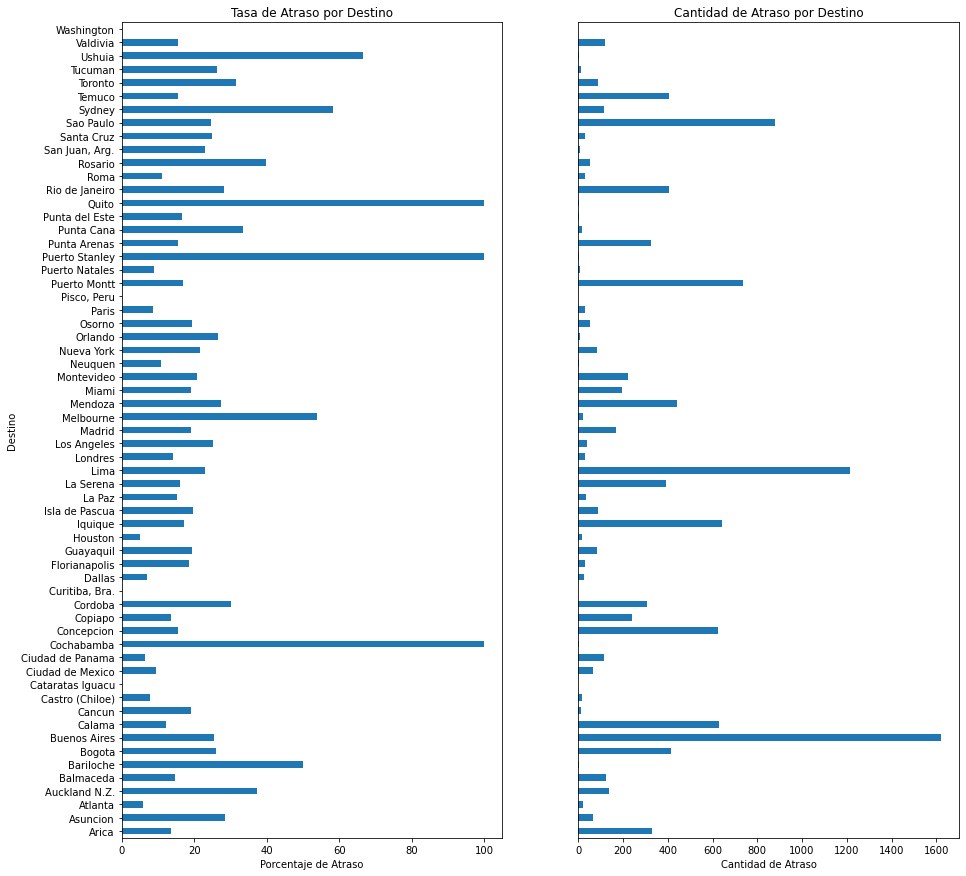

In [61]:
fig, ax = plt.subplots(1, 2, figsize = (15, 15))
delay_by_destiny_transpose["tasa_de_atraso_por_destino"].plot.barh(ax = ax[0])
ax[0].set_title("Tasa de Atraso por Destino")
ax[0].set_ylabel("Destino")
ax[0].set_xlabel('Porcentaje de Atraso')
delay_by_destiny_transpose["si"].plot.barh(ax = ax[1])
ax[1].set_title("Cantidad de Atraso por Destino")
ax[1].set_xlabel('Cantidad de Atraso')
ax[1].get_yaxis().set_visible(False)
plt.show()

#### Cantidad de atrasos por aerolínea

In [62]:
df_synthetic_features.groupby(['OPERA']).agg({'atraso_15':'value_counts'})

atraso_15
OPERA                    atraso_15           
Aerolineas Argentinas    no              1481
                         si               468
Aeromexico               no               341
                         si                10
Air Canada               no               307
                         si               258
Air France               no               328
                         si                30
Alitalia                 no               230
                         si                29
American Airlines        no               706
                         si                51
Austral                  no                59
                         si                15
Avianca                  no               846
                         si               306
British Airways          no               176
                         si                29
Copa Air                 no              1734
                         si               116
Delta Air                no               337
                         si                21
Gol Trans                no               519
                         si               287
Grupo LATAM              no             33586
                         si              7306
Iberia                   no               326
                         si                36
JetSmart SPA             no               899
                         si               196
K.L.M.                   no               230
                         si                21
Lacsa                    no                81
                         si                11
Latin American Wings     no               993
                         si               681
Oceanair Linhas Aereas   no               236
                         si                43
Plus Ultra Lineas Aereas si                30
                         no                19
Qantas Airways           si               113
                         no                82
Sky Airline              no             11758
                         si              2540
United Airlines          no               318
                         si                17

In [63]:
delay_by_operator = df_synthetic_features.groupby(['atraso_15', 'OPERA'])['Vlo-O'].size().unstack(fill_value=0)
delay_by_operator

OPERA,Aerolineas Argentinas,Aeromexico,Air Canada,Air France,Alitalia,American Airlines,Austral,Avianca,British Airways,Copa Air,...,Iberia,JetSmart SPA,K.L.M.,Lacsa,Latin American Wings,Oceanair Linhas Aereas,Plus Ultra Lineas Aereas,Qantas Airways,Sky Airline,United Airlines
atraso_15,,,,,,,,,,,,,,,,,,,,,
no,1481,341,307,328,230,706,59,846,176,1734,...,326,899,230,81,993,236,19,82,11758,318
si,468,10,258,30,29,51,15,306,29,116,...,36,196,21,11,681,43,30,113,2540,17


In [64]:
columns_opera = delay_by_operator.columns.values[:]
delay_by_operator_transpose = pd.pivot_table(delay_by_operator, columns='atraso_15', values=columns_opera).reset_index()
delay_by_operator_transpose

atraso_15,OPERA,no,si
0,Aerolineas Argentinas,1481,468
1,Aeromexico,341,10
2,Air Canada,307,258
3,Air France,328,30
4,Alitalia,230,29
5,American Airlines,706,51
6,Austral,59,15
7,Avianca,846,306
8,British Airways,176,29
9,Copa Air,1734,116


In [65]:
delay_by_operator_transpose['tasa_de_atraso_por_aerolinea'] = (delay_by_operator_transpose['si']/(delay_by_operator_transpose['si']+delay_by_operator_transpose['no']))*100
delay_by_operator_transpose

atraso_15,OPERA,no,si,tasa_de_atraso_por_aerolinea
0,Aerolineas Argentinas,1481,468,24.012314
1,Aeromexico,341,10,2.849003
2,Air Canada,307,258,45.663717
3,Air France,328,30,8.379888
4,Alitalia,230,29,11.196911
5,American Airlines,706,51,6.737120
6,Austral,59,15,20.270270
7,Avianca,846,306,26.562500
8,British Airways,176,29,14.146341
9,Copa Air,1734,116,6.270270


In [66]:
delay_by_operator_transpose.set_index('OPERA', inplace=True)
delay_by_operator_transpose

atraso_15,no,si,tasa_de_atraso_por_aerolinea
OPERA,,,
Aerolineas Argentinas,1481,468,24.012314
Aeromexico,341,10,2.849003
Air Canada,307,258,45.663717
Air France,328,30,8.379888
Alitalia,230,29,11.196911
American Airlines,706,51,6.737120
Austral,59,15,20.270270
Avianca,846,306,26.562500
British Airways,176,29,14.146341


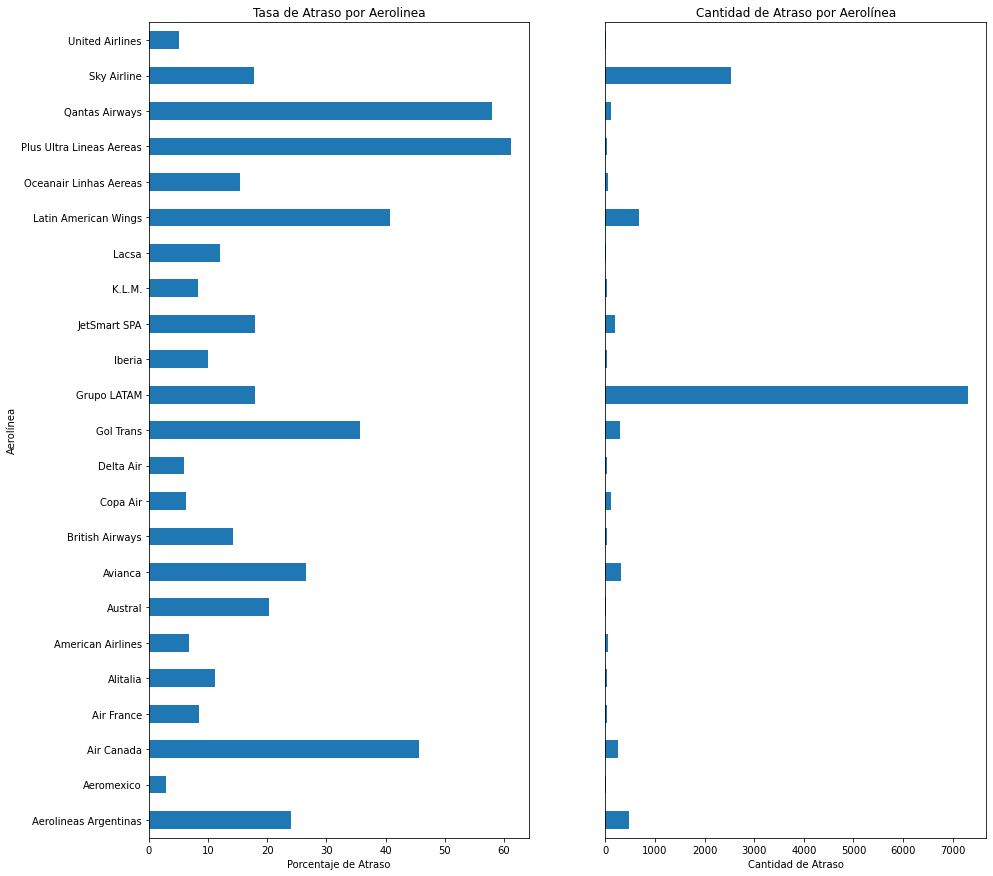

In [67]:
fig, ax = plt.subplots(1, 2, figsize = (15, 15))
delay_by_operator_transpose["tasa_de_atraso_por_aerolinea"].plot.barh(ax = ax[0])
ax[0].set_title("Tasa de Atraso por Aerolinea")
ax[0].set_ylabel("Aerolínea")
ax[0].set_xlabel('Porcentaje de Atraso')
delay_by_operator_transpose["si"].plot.barh(ax = ax[1])
ax[1].set_title("Cantidad de Atraso por Aerolínea")
ax[1].set_xlabel('Cantidad de Atraso')
ax[1].get_yaxis().set_visible(False)
plt.show()

#### Cantidad de atrasos por mes del año

In [68]:
df_synthetic_features.groupby(['MES']).agg({'atraso_15':'value_counts'})

atraso_15
MES atraso_15           
1   no              5130
    si               978
2   no              4718
    si               843
3   no              4851
    si               631
4   no              4435
    si               585
5   no              4413
    si               827
6   no              4129
    si               852
7   no              4234
    si              1758
8   no              4748
    si               996
9   no              4643
    si               967
10  no              4669
    si              1363
11  no              4881
    si              1199
12  no              4741
    si              1615

In [69]:
delay_by_month = df_synthetic_features.groupby(['atraso_15', 'MES'])['Vlo-O'].size().unstack(fill_value=0)
delay_by_month

MES,1,2,3,4,5,6,7,8,9,10,11,12
atraso_15,,,,,,,,,,,,
no,5130,4718,4851,4435,4413,4129,4234,4748,4643,4669,4881,4741
si,978,843,631,585,827,852,1758,996,967,1363,1199,1615


In [70]:
columns_month = delay_by_month.columns.values[:]
delay_by_month_transpose = pd.pivot_table(delay_by_month, columns='atraso_15', values=columns_month).reset_index()
delay_by_month_transpose

atraso_15,MES,no,si
0,1,5130,978
1,2,4718,843
2,3,4851,631
3,4,4435,585
4,5,4413,827
5,6,4129,852
6,7,4234,1758
7,8,4748,996
8,9,4643,967
9,10,4669,1363


In [71]:
delay_by_month_transpose['tasa_de_atraso_por_mes'] = (delay_by_month_transpose['si']/(delay_by_month_transpose['si']+delay_by_month_transpose['no']))*100
delay_by_month_transpose

atraso_15,MES,no,si,tasa_de_atraso_por_mes
0,1,5130,978,16.011788
1,2,4718,843,15.159144
2,3,4851,631,11.510398
3,4,4435,585,11.653386
4,5,4413,827,15.782443
5,6,4129,852,17.104999
6,7,4234,1758,29.339119
7,8,4748,996,17.339833
8,9,4643,967,17.237077
9,10,4669,1363,22.596154


In [72]:
delay_by_month_transpose.set_index('MES', inplace=True)
delay_by_month_transpose

atraso_15,no,si,tasa_de_atraso_por_mes
MES,,,
1,5130,978,16.011788
2,4718,843,15.159144
3,4851,631,11.510398
4,4435,585,11.653386
5,4413,827,15.782443
6,4129,852,17.104999
7,4234,1758,29.339119
8,4748,996,17.339833
9,4643,967,17.237077


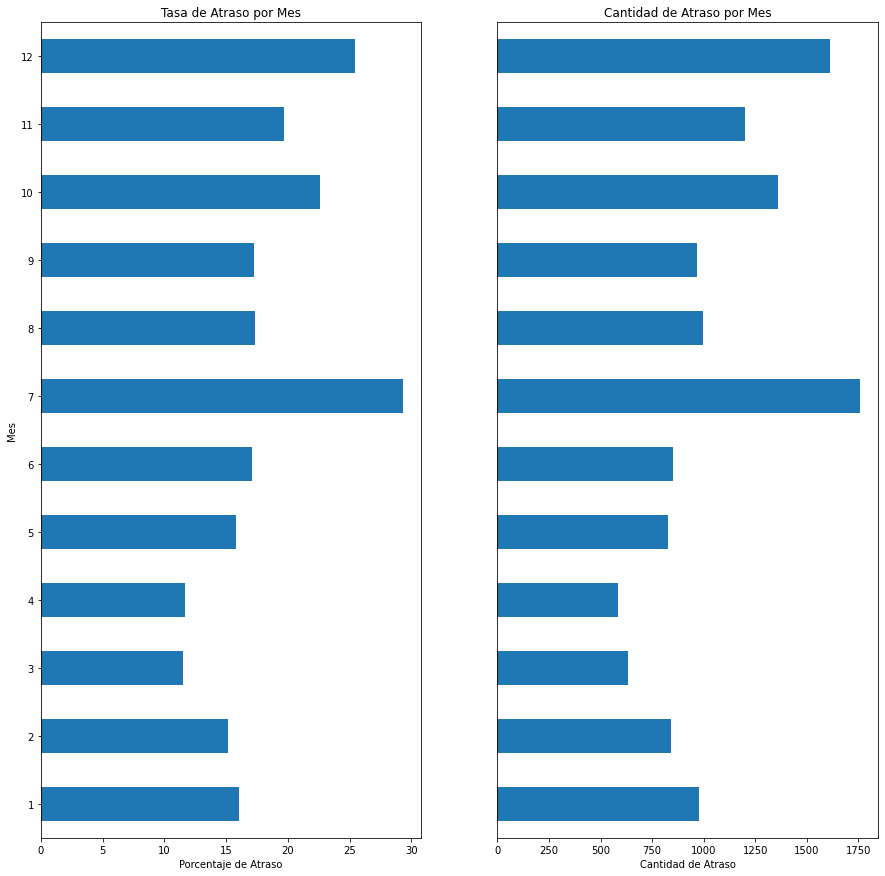

In [73]:
fig, ax = plt.subplots(1, 2, figsize = (15, 15))
delay_by_month_transpose["tasa_de_atraso_por_mes"].plot.barh(ax = ax[0])
ax[0].set_title("Tasa de Atraso por Mes")
ax[0].set_ylabel("Mes")
ax[0].set_xlabel('Porcentaje de Atraso')
delay_by_month_transpose["si"].plot.barh(ax = ax[1])
ax[1].set_title("Cantidad de Atraso por Mes")
ax[1].set_xlabel('Cantidad de Atraso')
ax[1].get_yaxis().set_visible(False)
plt.show()

#### Cantidad de atrasos por dia de la semana

In [74]:
df_synthetic_features.groupby(['DIANOM']).agg({'atraso_15':'value_counts'})

atraso_15
DIANOM    atraso_15           
Domingo   no              8218
          si              1578
Jueves    no              8206
          si              2045
Lunes     no              8083
          si              2048
Martes    no              8028
          si              1634
Miercoles no              8061
          si              1661
Sabado    no              6989
          si              1363
Viernes   no              8007
          si              2285

In [75]:
delay_by_day = df_synthetic_features.groupby(['atraso_15', 'DIANOM'])['Vlo-O'].size().unstack(fill_value=0)
delay_by_day

DIANOM,Domingo,Jueves,Lunes,Martes,Miercoles,Sabado,Viernes
atraso_15,,,,,,,
no,8218,8206,8083,8028,8061,6989,8007
si,1578,2045,2048,1634,1661,1363,2285


In [76]:
columns_day = delay_by_day.columns.values[1:]
delay_by_day_transpose = pd.pivot_table(delay_by_day, columns='atraso_15', values=columns_day).reset_index()
delay_by_day_transpose

atraso_15,DIANOM,no,si
0,Jueves,8206,2045
1,Lunes,8083,2048
2,Martes,8028,1634
3,Miercoles,8061,1661
4,Sabado,6989,1363
5,Viernes,8007,2285


In [77]:
delay_by_day_transpose['tasa_de_atraso_por_dia'] = (delay_by_day_transpose['si']/(delay_by_day_transpose['si']+delay_by_day_transpose['no']))*100
delay_by_day_transpose

atraso_15,DIANOM,no,si,tasa_de_atraso_por_dia
0,Jueves,8206,2045,19.949273
1,Lunes,8083,2048,20.215181
2,Martes,8028,1634,16.911613
3,Miercoles,8061,1661,17.084962
4,Sabado,6989,1363,16.319444
5,Viernes,8007,2285,22.201710


In [78]:
delay_by_day_transpose.set_index('DIANOM', inplace=True)
delay_by_day_transpose

atraso_15,no,si,tasa_de_atraso_por_dia
DIANOM,,,
Jueves,8206,2045,19.949273
Lunes,8083,2048,20.215181
Martes,8028,1634,16.911613
Miercoles,8061,1661,17.084962
Sabado,6989,1363,16.319444
Viernes,8007,2285,22.201710


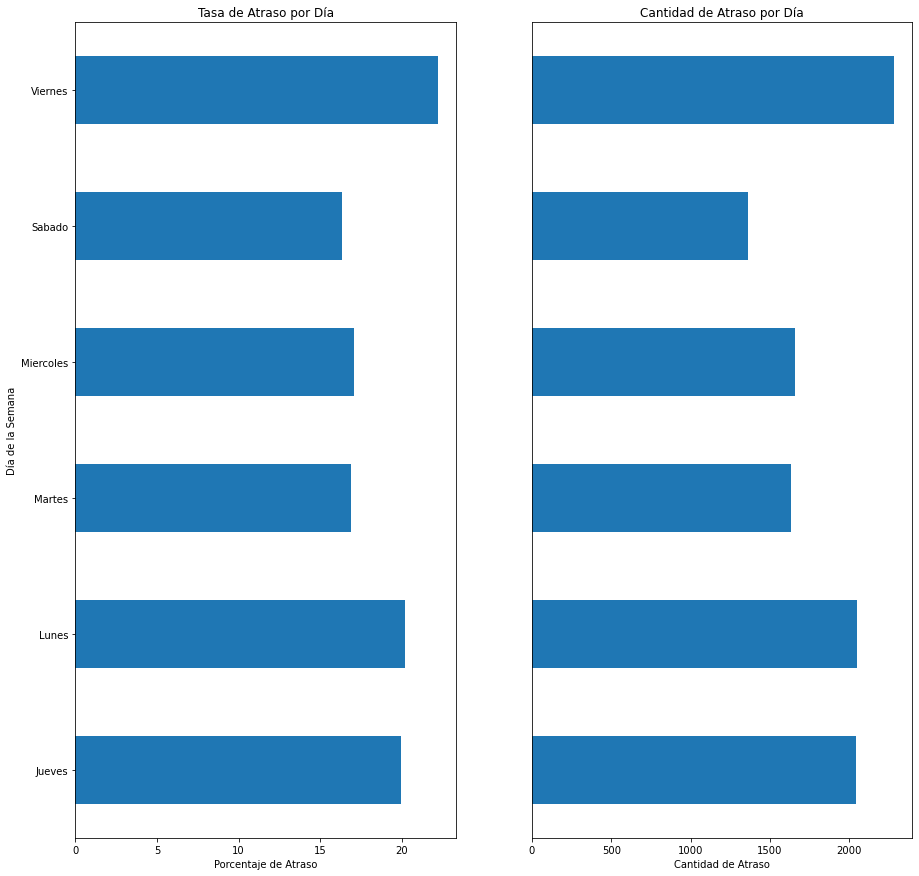

In [79]:
fig, ax = plt.subplots(1, 2, figsize = (15, 15))
delay_by_day_transpose["tasa_de_atraso_por_dia"].plot.barh(ax = ax[0])
ax[0].set_title("Tasa de Atraso por Día")
ax[0].set_ylabel("Día de la Semana")
ax[0].set_xlabel('Porcentaje de Atraso')
delay_by_day_transpose["si"].plot.barh(ax = ax[1])
ax[1].set_title("Cantidad de Atraso por Día")
ax[1].set_xlabel('Cantidad de Atraso')
ax[1].get_yaxis().set_visible(False)
plt.show()

#### Cantidad de atrasos por temporada

In [80]:
df_synthetic_features.groupby(['temporada_alta']).agg({'atraso_15':'value_counts'})

atraso_15
temporada_alta atraso_15           
0              no             37300
               si              8144
1              no             18292
               si              4470

In [81]:
delay_by_season = df_synthetic_features.groupby(['atraso_15', 'temporada_alta'])['Vlo-O'].size().unstack(fill_value=0)
delay_by_season

temporada_alta,0,1
atraso_15,,
no,37300,18292
si,8144,4470


In [82]:
columns_season = delay_by_season.columns.values[:]
delay_by_season_transpose = pd.pivot_table(delay_by_season, columns='atraso_15', values=columns_season).reset_index()
delay_by_season_transpose

atraso_15,temporada_alta,no,si
0,0,37300,8144
1,1,18292,4470


In [83]:
delay_by_season_transpose['tasa_de_atraso_por_temporada'] = (delay_by_season_transpose['si']/(delay_by_season_transpose['si']+delay_by_season_transpose['no']))*100
delay_by_season_transpose

atraso_15,temporada_alta,no,si,tasa_de_atraso_por_temporada
0,0,37300,8144,17.920958
1,1,18292,4470,19.637993


In [84]:
delay_by_season_transpose.set_index('temporada_alta', inplace=True)
delay_by_season_transpose

atraso_15,no,si,tasa_de_atraso_por_temporada
temporada_alta,,,
0,37300,8144,17.920958
1,18292,4470,19.637993


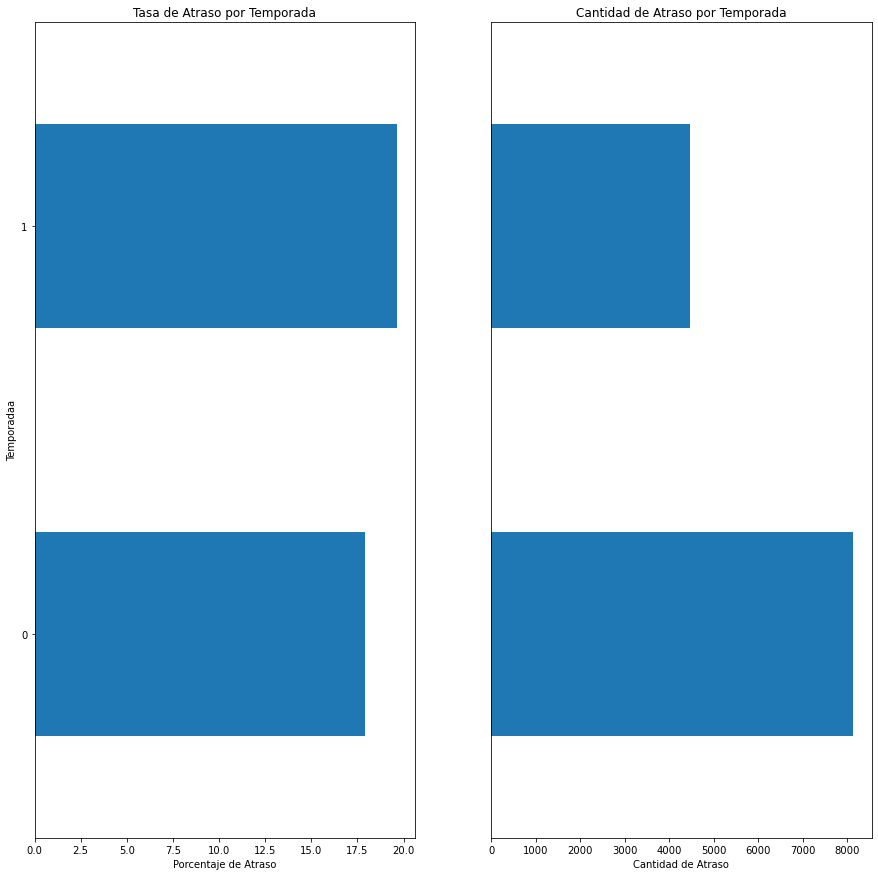

In [85]:
fig, ax = plt.subplots(1, 2, figsize = (15, 15))
delay_by_season_transpose["tasa_de_atraso_por_temporada"].plot.barh(ax = ax[0])
ax[0].set_title("Tasa de Atraso por Temporada")
ax[0].set_ylabel("Temporadaa")
ax[0].set_xlabel('Porcentaje de Atraso')
delay_by_season_transpose["si"].plot.barh(ax = ax[1])
ax[1].set_title("Cantidad de Atraso por Temporada")
ax[1].set_xlabel('Cantidad de Atraso')
ax[1].get_yaxis().set_visible(False)
plt.show()

#### Cantidad de atrasos por tipo de vuelo

In [86]:
df_synthetic_features.groupby(['TIPOVUELO']).agg({'atraso_15':'value_counts'})

atraso_15
TIPOVUELO atraso_15           
I         no             24192
          si              7048
N         no             31400
          si              5566

In [87]:
delay_by_type = df_synthetic_features.groupby(['atraso_15', 'TIPOVUELO'])['Vlo-O'].size().unstack(fill_value=0)
delay_by_type

TIPOVUELO,I,N
atraso_15,,
no,24192,31400
si,7048,5566


In [88]:
columns_type = delay_by_type.columns.values[:]
delay_by_type_transpose = pd.pivot_table(delay_by_type, columns='atraso_15', values=columns_type).reset_index()
delay_by_type_transpose

atraso_15,TIPOVUELO,no,si
0,I,24192,7048
1,N,31400,5566


In [89]:
delay_by_type_transpose['tasa_de_atraso_por_tipo'] = (delay_by_type_transpose['si']/(delay_by_type_transpose['si']+delay_by_type_transpose['no']))*100
delay_by_type_transpose

atraso_15,TIPOVUELO,no,si,tasa_de_atraso_por_tipo
0,I,24192,7048,22.560819
1,N,31400,5566,15.057079


In [90]:
delay_by_type_transpose.set_index('TIPOVUELO', inplace=True)
delay_by_type_transpose

atraso_15,no,si,tasa_de_atraso_por_tipo
TIPOVUELO,,,
I,24192,7048,22.560819
N,31400,5566,15.057079


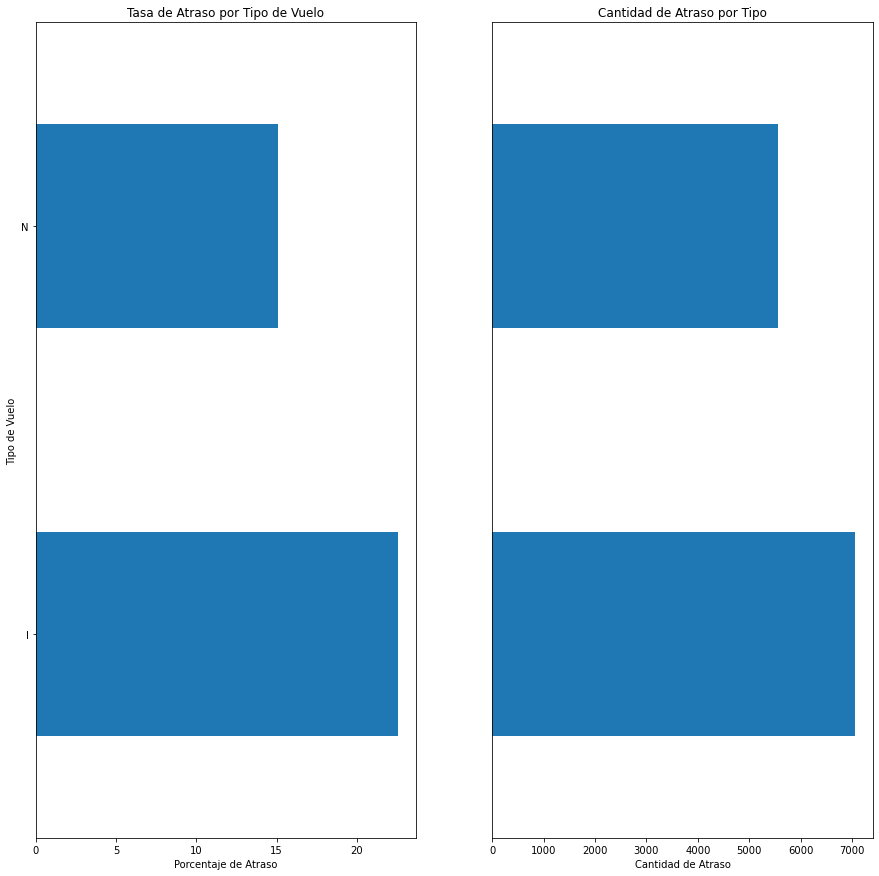

In [92]:
fig, ax = plt.subplots(1, 2, figsize = (15, 15))
delay_by_type_transpose["tasa_de_atraso_por_tipo"].plot.barh(ax = ax[0])
ax[0].set_title("Tasa de Atraso por Tipo de Vuelo")
ax[0].set_ylabel("Tipo de Vuelo")
ax[0].set_xlabel('Porcentaje de Atraso')
delay_by_type_transpose["si"].plot.barh(ax = ax[1])
ax[1].set_title("Cantidad de Atraso por Tipo")
ax[1].set_xlabel('Cantidad de Atraso')
ax[1].get_yaxis().set_visible(False)
plt.show()

#### ¿Qué variables esperarías que más inﬂuyeran en predecir atrasos?

In [94]:
delay_features = df_synthetic_features.groupby(['SIGLADES','OPERA','MES','DIANOM','temporada_alta','TIPOVUELO']).agg({'atraso_15':'value_counts'})
delay_features

atraso_15
SIGLADES    OPERA           MES DIANOM  temporada_alta TIPOVUELO atraso_15           
Antofagasta Grupo LATAM     1   Domingo 1              N         no                41
                                                                 si                 6
                                Jueves  1              N         no                52
                                                                 si                 6
                                Lunes   1              N         no                59
...                                                                               ...
Valdivia    Sky Airline     12  Viernes 0              N         no                 3
                                                                 si                 1
                                        1              N         si                 5
                                                                 no                 1
Washington  United Airlines 8   Martes  0              I         no                 1

[12465 rows x 1 columns]

- Se puede determinar que las variables que más influyen a la hora de predecir un retrazo esta dividido en las características que generar un mayor porcentaje pudiendo generar una hipotesis de que si es un vuelo internacional, en temporada alta, un viernes y coincidiendo con el mes 7 y es de las aerolineas que dieron una tasa mas alta de retraso serian factores determinantes a que esas variables influyan en que tengamos un retraso. 